In [2]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import pandas as pd

In [3]:
df = pd.read_csv('acled_2022.csv')
df.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,UKR79640,31 October 2022,2022,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Russia (2000-) Air Force,NaN,8,...,Novodnistrovsk,48.5780,27.4400,2,Newsmaker.md; Ziarul de Garda,International,"On 31 October 2022, Russian forces flew a suic...",0,NaN,1667924774
1,UKR78834,31 October 2022,2022,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Ukraine (2019-),NaN,1,...,Khmelnytskyi,49.4128,26.9980,3,24 Channel,National,"Interception: On 31 October 2022, Ukrainian ai...",0,NaN,1667924774
2,UKR78935,31 October 2022,2022,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Russia (2000-),NaN,8,...,Cherkasy,49.4285,32.0621,3,24 Channel,National,"On 31 October 2022, Russian forces shelled Che...",0,NaN,1667924774
3,UKR79167,31 October 2022,2022,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Russia (2000-),NaN,8,...,Pavlohrad,48.5343,35.8710,1,24 Channel,National,"On 31 October 2022, Russian forces shelled Pav...",0,NaN,1667924774
4,UKR78940,31 October 2022,2022,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Russia (2000-),NaN,8,...,Ochakiv,46.6128,31.5498,2,24 Channel,National,"On 31 October 2022, Russian forces shelled the...",2,NaN,1667924774


In [4]:
df.disorder_type.value_counts()

disorder_type
Political violence                    27191
Strategic developments                 1110
Demonstrations                          202
Political violence; Demonstrations       17
Name: count, dtype: int64

In [5]:
df.event_type.value_counts()

event_type
Explosions/Remote violence    21896
Battles                        4496
Strategic developments         1110
Violence against civilians      796
Protests                        217
Riots                             5
Name: count, dtype: int64

In [28]:
item = df.iloc[[25740]]
item.notes.to_string()
with open('high_kyiv.txt', 'w') as f:
    f.write(item.notes.to_string())

In [19]:
march = df[df.event_date == '15 March 2022']
march = march[['admin1', 'notes', 'fatalities']]
print(march)

           admin1                                              notes  \
25627       Odesa  On 15 March 2022, Russian forces fired rockets...   
25628  Zaporizhia  On 15 March 2022, Russian forces kidnapped fou...   
25629   Kyiv City  On 15 March 2022, Russian forces shelled Kyiv ...   
25630   Kyiv City  On 15 March 2022, Russian forces shelled Kyiv ...   
25631       Odesa  On 15 March 2022, Russian forces fired rockets...   
...           ...                                                ...   
25764        Kyiv  Around 15 March 2022 (month of), Russian force...   
25765     Kharkiv  Around 15 March 2022 (month of), Russian force...   
25766     Donetsk  Around 15 March 2022 (month of), Russian force...   
25767        Kyiv  On 15 March 2022, Russian forces abducted 6 Uk...   
25768  Zaporizhia  On 15 March 2022, Russian forces kidnapped a m...   

       fatalities  
25627           0  
25628           0  
25629           2  
25630           4  
25631           0  
...           .

In [20]:
kyiv = march[march.admin1 == 'Kyiv']
kyiv['fatalities'].sort_values(ascending=False)
kyiv.iloc[[25740]]

IndexError: positional indexers are out-of-bounds

In [48]:
print(df.columns)

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp'],
      dtype='object')


In [49]:
cols = ['event_date', 'admin1', 'fatalities']
df = df[cols]
df.head()

,event_date,admin1,fatalities
0,31 October 2022,Chernivtsi,0
1,31 October 2022,Khmelnytskyi,0
2,31 October 2022,Cherkasy,0
3,31 October 2022,Dnipropetrovsk,0
4,31 October 2022,Mykolaiv,2


In [50]:
cnt_col = [1] * len(df)
df['event'] = cnt_col

In [51]:
df_date = df.groupby(['event_date'])
df_date.first()

,admin1,fatalities,event
event_date,,,
01 April 2022,Chernihiv,0,1
01 August 2022,Kharkiv,1,1
01 February 2022,Donetsk,0,1
01 July 2022,Odesa,21,1
01 June 2022,Sumy,0,1
...,...,...,...
31 August 2022,Mykolaiv,0,1
31 July 2022,Crimea,0,1
31 March 2022,Chernihiv,0,1


In [52]:
df_city = df.groupby(['admin1', 'event_date'])
df_city.first()

fatalities  event
admin1   event_date                          
Cherkasy 03 August 2022              0      1
         04 May 2022                 0      1
         08 August 2022              1      1
         10 October 2022             0      1
         11 September 2022          30      1
...                                ...    ...
Zhytomyr 27 February 2022            2      1
         28 February 2022            0      1
         28 March 2022               0      1
         29 March 2022               0      1
         30 March 2022               0      1

[2743 rows x 2 columns]

In [53]:
df.admin1.unique()

array(['Chernivtsi', 'Khmelnytskyi', 'Cherkasy', 'Dnipropetrovsk',
       'Mykolaiv', 'Kyiv City', 'Lviv', 'Kirovograd', 'Kharkiv',
       'Vinnytsia', 'Zaporizhia', 'Donetsk', 'Luhansk', 'Sumy', 'Kherson',
       'Chernihiv', 'Crimea', nan, 'Odesa', 'Rivne', 'Volyn', 'Kyiv',
       'Ivano-Frankivsk', 'Zhytomyr', 'Ternopil', 'Poltava',
       'Zakarpattia'], dtype=object)

In [54]:
df[df.isnull().any(axis=1)]

,event_date,admin1,fatalities,event
514,27 October 2022,NaN,0,1
1652,17 October 2022,NaN,0,1
9481,22 August 2022,NaN,0,1
17886,20 June 2022,NaN,0,1
19308,04 June 2022,NaN,0,1
23552,13 April 2022,NaN,37,1
26545,06 March 2022,NaN,0,1
27268,26 February 2022,NaN,0,1


In [55]:
df.dropna(inplace = True)

In [56]:
ukrainian_oblasts = {
    'Dnipropetrovsk': 'East',
    'Donetsk': 'East',
    'Kharkiv': 'East',
    'Kherson': 'South',
    'Luhansk': 'East',
    'Sumy': 'North',
    'Zaporizhia': 'East',
    'Mykolaiv': 'South',
    'Cherkasy': 'Center',
    'Poltava': 'Center',
    'Crimea': 'South',
    'Odesa': 'South',
    'Kyiv City': 'Kyiv',
    'Kirovograd': 'Center',
    'Vinnytsia': 'Center',
    'Khmelnytskyi': 'West',
    'Lviv': 'West',
    'Zhytomyr': 'North',
    'Rivne': 'West',
    'Chernivtsi': 'West',
    'Ivano-Frankivsk': 'West',
    'Ternopil': 'West',
    'Kyiv': 'Kyiv',
    'Volyn': 'West',
    'Chernihiv': 'North',
    'Zakarpattia' : 'West'
}

In [57]:
regions = []
for idx, item in df.iterrows():
    regions.append(ukrainian_oblasts[item.admin1])

In [58]:
df['region'] = regions
df.head()

,event_date,admin1,fatalities,event,region
0,31 October 2022,Chernivtsi,0,1,West
1,31 October 2022,Khmelnytskyi,0,1,West
2,31 October 2022,Cherkasy,0,1,Center
3,31 October 2022,Dnipropetrovsk,0,1,East
4,31 October 2022,Mykolaiv,2,1,South


In [59]:
df.drop(columns = ['admin1'], inplace=True)

In [60]:
df['event_date'] = pd.to_datetime(df['event_date'], format='%d %B %Y')
df.head()

,event_date,fatalities,event,region
0,2022-10-31,0,1,West
1,2022-10-31,0,1,West
2,2022-10-31,0,1,Center
3,2022-10-31,0,1,East
4,2022-10-31,2,1,South


In [61]:
fatality = df.groupby(['event_date', 'region']).sum()
fatality

fatalities  event
event_date region                   
2022-02-01 Center           0      1
           East             0     23
           Kyiv             0      3
2022-02-02 East             0     23
           Kyiv             0      1
...                       ...    ...
2022-10-31 East             6     72
           Kyiv             0      2
           North            0      3
           South            2      5
           West             0      4

[1043 rows x 2 columns]

In [62]:
fatality.index.sortlevel('event_date')

(MultiIndex([('2022-02-01', 'Center'),
             ('2022-02-01',   'East'),
             ('2022-02-01',   'Kyiv'),
             ('2022-02-02',   'East'),
             ('2022-02-02',   'Kyiv'),
             ('2022-02-03',   'East'),
             ('2022-02-03',   'Kyiv'),
             ('2022-02-04',   'East'),
             ('2022-02-04',   'Kyiv'),
             ('2022-02-04',   'West'),
             ...
             ('2022-10-29',  'South'),
             ('2022-10-30',   'East'),
             ('2022-10-30',  'North'),
             ('2022-10-30',  'South'),
             ('2022-10-31', 'Center'),
             ('2022-10-31',   'East'),
             ('2022-10-31',   'Kyiv'),
             ('2022-10-31',  'North'),
             ('2022-10-31',  'South'),
             ('2022-10-31',   'West')],
            names=['event_date', 'region'], length=1043),
 array([   0,    1,    2, ..., 1040, 1041, 1042]))

In [63]:
fatality.head()

fatalities  event
event_date region                   
2022-02-01 Center           0      1
           East             0     23
           Kyiv             0      3
2022-02-02 East             0     23
           Kyiv             0      1

In [74]:
all_dates = pd.date_range(np.min(fatality.index.get_level_values('event_date')), np.max(fatality.index.get_level_values('event_date')))
all_places = list(set(fatality.index.get_level_values('region')))
ind2 = pd.MultiIndex.from_product([all_dates,all_places], names = ['event_date','region'])
fatality = fatality.reindex(ind2, fill_value = 0) 
fatality.index.sortlevel('event_date')

(MultiIndex([('2022-02-01', 'Center'),
             ('2022-02-01',   'East'),
             ('2022-02-01',   'Kyiv'),
             ('2022-02-01',  'North'),
             ('2022-02-01',  'South'),
             ('2022-02-01',   'West'),
             ('2022-02-02', 'Center'),
             ('2022-02-02',   'East'),
             ('2022-02-02',   'Kyiv'),
             ('2022-02-02',  'North'),
             ...
             ('2022-10-30',   'Kyiv'),
             ('2022-10-30',  'North'),
             ('2022-10-30',  'South'),
             ('2022-10-30',   'West'),
             ('2022-10-31', 'Center'),
             ('2022-10-31',   'East'),
             ('2022-10-31',   'Kyiv'),
             ('2022-10-31',  'North'),
             ('2022-10-31',  'South'),
             ('2022-10-31',   'West')],
            names=['event_date', 'region'], length=1638),
 array([   4,    1,    5, ..., 1634, 1632, 1635]))

In [75]:
len(fatality)

1638

In [76]:
pickle.dump(fatality, open('acled_2022.pkl', 'wb'))

In [77]:
regions = list(set(fatality.index.get_level_values('region')))
days = list(set(fatality.index.get_level_values('event_date')))

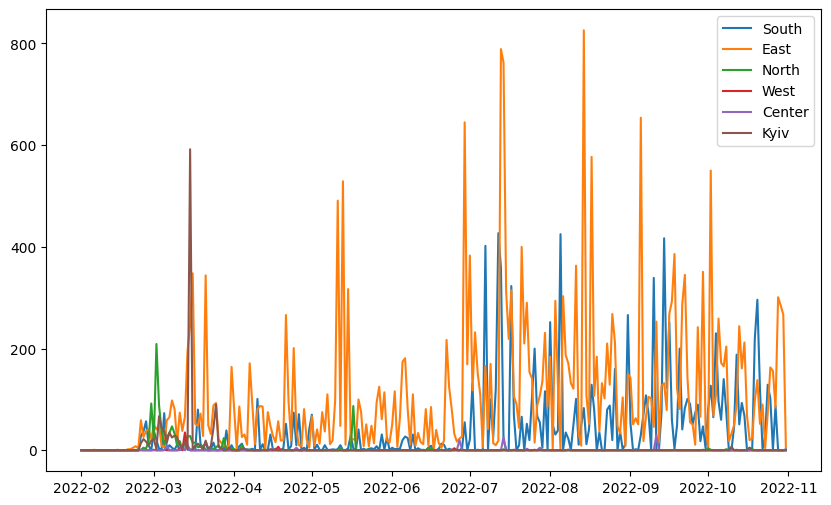

In [85]:
fig, ax = plt.subplots(figsize=(10, 6))
for r in regions:
    ax.plot(fatality.xs(r,level=1).loc[:,'fatalities'], label = r)
ax.legend()
xtick_locator = mdates.AutoDateLocator()
xtick_formatter = mdates.AutoDateFormatter(xtick_locator)
ax.xaxis.set_major_locator(xtick_locator)
ax.xaxis.set_major_formatter(xtick_formatter)
plt.savefig("acled_fatality.png")
plt.show()
plt.close()

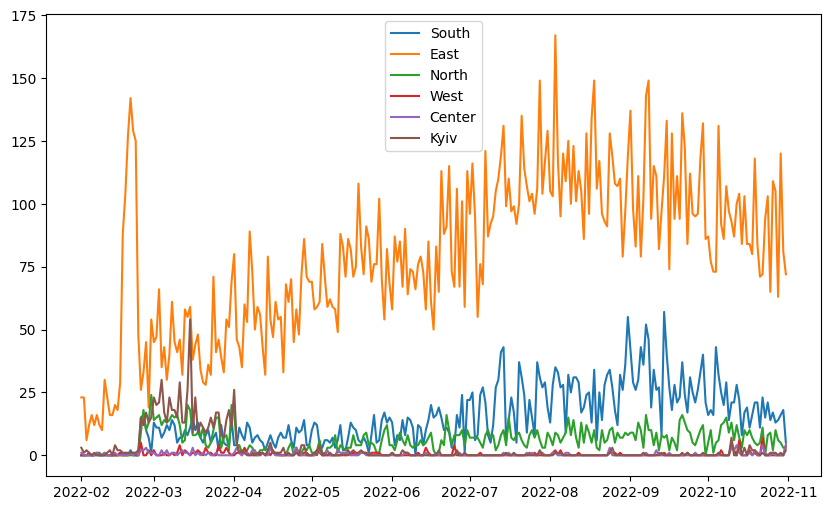

In [86]:
fig, ax = plt.subplots(figsize=(10, 6))
for r in regions:
    ax.plot(fatality.xs(r,level=1).loc[:,'event'], label = r)
ax.legend()
xtick_locator = mdates.AutoDateLocator()
xtick_formatter = mdates.AutoDateFormatter(xtick_locator)
ax.xaxis.set_major_locator(xtick_locator)
ax.xaxis.set_major_formatter(xtick_formatter)
plt.savefig("acled_event.png")
plt.show()
plt.close()